Import Open CV module

In [8]:
import cv2

To install DeepFace, run !pip install DeepFace, and use the DeepFace class to perform facial analysis tasks such as face recognition and facial attribute analysis.

In [7]:
#pip install DeepFace
from deepface import DeepFace 

Plot the actual Image

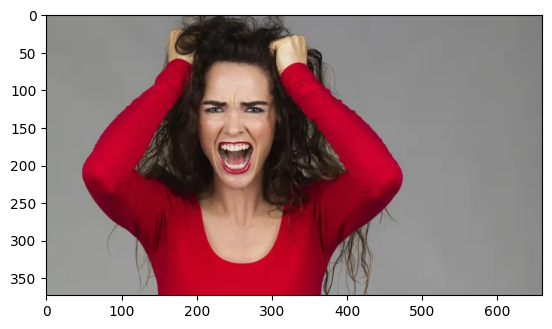

In [1]:
import matplotlib.pyplot as plt
import cv2

# Load the image using OpenCV
img = cv2.imread("angry.jpeg")

# Convert the BGR image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img)
plt.show()

Convert the Loaded image to Gray Scale image

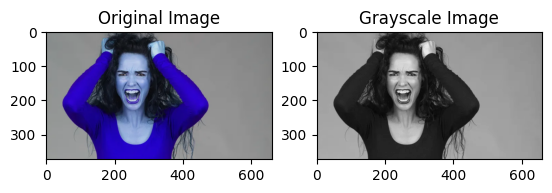

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original image using Matplotlib
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the grayscale image using Matplotlib
plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')

plt.show()

Detecting every face with Gray Scale image

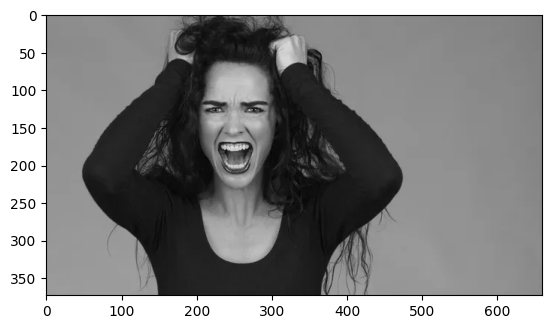

In [3]:

# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image using the classifier
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Draw a rectangle around each detected face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with the detected faces using Matplotlib
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

Crop the unwanted area from the Photo

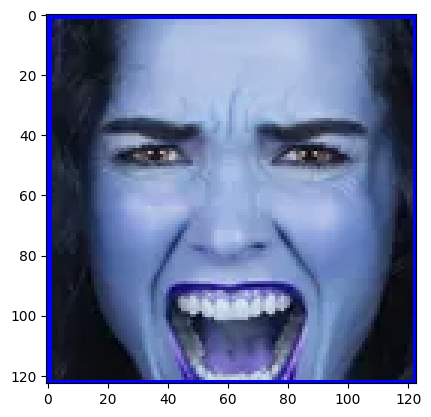

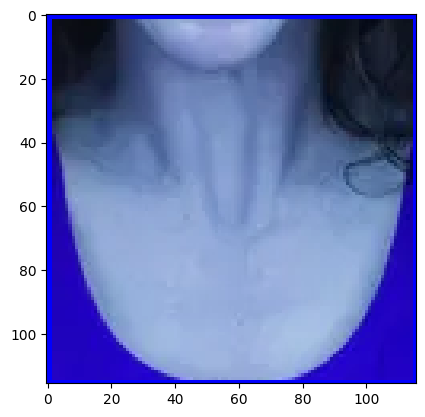

In [4]:
for (x, y, w, h) in faces:
    face_cropped = img[y:y+h, x:x+w]
    plt.imshow(cv2.cvtColor(face_cropped, cv2.COLOR_BGR2RGB))
    plt.show()

Now, for demonstrating the speed!!!

In [5]:
import time

Time taken by DeepFace to analyze using Cropped image vs Uncropped image

In [9]:
# Analyze emotions in the full image
start_time = time.time()
DeepFace.analyze(img, actions=['emotion'])
end_time = time.time()
time_uncropped = end_time - start_time

# Analyze emotions in the full image
start_time = time.time()
DeepFace.analyze(face_cropped, actions=['emotion'], enforce_detection= False)
end_time = time.time()
time_cropped = end_time - start_time


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]


Show the time difference 

In [10]:

# Print the time it takes to analyze emotions in each image
print("Time to analyze emotions in uncropped face image: %.2f seconds" % time_uncropped)

# Print the time it takes to analyze emotions in each image
print("Time to analyze emotions in cropped face image: %.2f seconds" % time_cropped)

Time to analyze emotions in uncropped face image: 1.02 seconds
Time to analyze emotions in cropped face image: 0.11 seconds


Speed difference in percentage

In [11]:
speed_perc = ((time_uncropped - time_cropped)/time_uncropped)*100
print("the speed difference in percentage is "+ str(speed_perc)+" %")

the speed difference in percentage is 89.33556510936292 %


Lets Plot the same and see it visually!

In [12]:
import numpy as np

In [13]:

# Define lists to store the time taken
time_taken_cropped = []
time_taken_uncropped = []

# Analyze emotions in the cropped face image and full image 10 times
for i in range(10):
    start_time_uncropped = time.time()

    # Analyze emotions in the full image
    DeepFace.analyze(img, actions=['emotion'], enforce_detection= False)

    end_time_uncropped = time.time()

    # Calculate the time taken for the uncropped image
    time_taken_uncropped_i = end_time_uncropped - start_time_uncropped
    time_taken_uncropped.append(time_taken_uncropped_i)

    start_time_cropped = time.time()

    DeepFace.analyze(face_cropped, actions=['emotion'],enforce_detection= False)

    end_time_cropped = time.time()

    # Calculate the time taken for the cropped image
    time_taken_cropped_i = end_time_cropped - start_time_cropped
    time_taken_cropped.append(time_taken_cropped_i)



Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


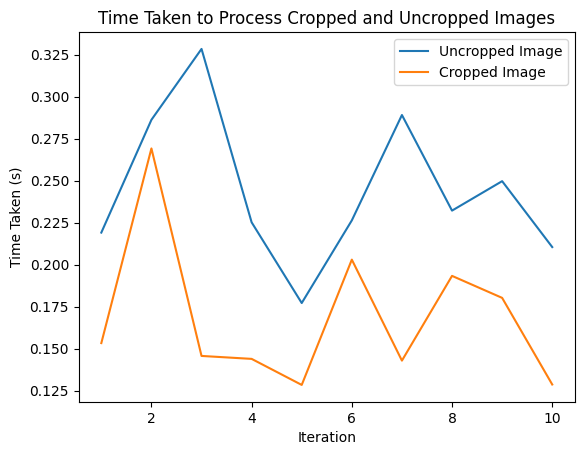

In [14]:
# Plot the time taken using Matplotlib
x = range(1, 11)
plt.plot(x, time_taken_uncropped, label='Uncropped Image')
plt.plot(x, time_taken_cropped, label='Cropped Image')
plt.title('Time Taken to Process Cropped and Uncropped Images')
plt.xlabel('Iteration')
plt.ylabel('Time Taken (s)')
plt.legend()
plt.show()

In [16]:

# Analyze emotions in the haar cascade
start_time = time.time()
DeepFace.analyze(face_cropped, actions=['emotion'],enforce_detection= False)
end_time = time.time()
time_nohaar = end_time - start_time


face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(face_cropped, scaleFactor=1.3, minNeighbors=5)


# Analyze emotions in the no haar cascade image
start_time = time.time()
DeepFace.analyze(face_cropped, actions=['emotion'],enforce_detection= False)
end_time = time.time()
time_haar = end_time - start_time


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


Emotion Recognition with Haar-cascade vs Without Haar-cascade

In [17]:

# Print the time it takes to analyze emotions in each image
print("Time to analyze emotions without Haar Cascade face image: %.2f seconds" % time_nohaar)

# Print the time it takes to analyze emotions in each image
print("Time to analyze emotions with Haar Cascade face image: %.2f seconds" % time_haar)

Time to analyze emotions without Haar Cascade face image: 0.14 seconds
Time to analyze emotions with Haar Cascade face image: 0.13 seconds


Calculating accuracy growth

In [18]:
growth_in_accuracy = ((time_nohaar-time_haar)/time_nohaar)*100

Show the accuracy growth

In [19]:
print("Growth in accuracy "+ str(growth_in_accuracy)+ " %")

Growth in accuracy 4.362087423976675 %


In [20]:
# Load the cascade classifier
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace 

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()
    

    # Convert the frame to grayscale
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

    # Draw a rectangle around each face
    for (x, y, w, h) in faces:
        #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        #face_cropped = frame[y:y+h, x:x+w]
        predictions = DeepFace.analyze(frame,actions=['emotion'],enforce_detection = False)
        
        # Adjust the position and font size of the text
        print(predictions[0]['dominant_emotion'])
        #cv2.putText(frame, predictions[0]['dominant_emotion'], (x+w+10, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow("Face Detection", frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the video capture and destroy the window
cap.release()
cv2.destroyAllWindows()

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.91it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


sad


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


sad


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


fear


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


neutral


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]


sad


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]


neutral


In [ ]:
class Fibonacci {
    public static String test(int n) {
        String fib = "";
        int first_num = 0;
        int second_num = 1;
        int third_num;
        fib += String.valueOf(first_num) + " " + String.valueOf(second_num) ;

        for(int i=0; i<n-2 ; i++){
            fib += " ";
            third_num = first_num + second_num;
            first_num = second_num ;
            second_num = third_num ;
            fib += String.valueOf(third_num);
        }


        // Enter your code here
        // Store your final result in the variable fib

        
        /* You do not need to worry too much about the return statement for the 
        moment and just set the value of “fib” correctly*/


        return fib;
    }
}